# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

# Введение

>Представим, что перед полноценным запуском рекомендательной системы в онлайн-магазине мы протестировали её на части покупателей и увидели, что средний чек заказа вырос. Означает ли это, что мы увидим такой же результат и на других заказах? Можно ли запускать рекомендательную систему для всех покупателей?

- Отвечать на подобные вопросы позволяет аппарат статистических тестов.

Статистические тесты — один из наиболее важных инструментов в Data Science, который позволяет проверять гипотезы и принимать решения на основе данных. Благодаря статистическим тестам можно провести анализ и сделать вывод о том, являются ли различия между двумя выборками данных случайными или обусловленными каким-то влиянием.

Вам будут встречаться разнообразные бизнес-задачи, и статистические тесты позволят избегать ошибочных решений. В примере выше благодаря статистическим тестам удастся сэкономить ресурсы компании, если окажется, что запуск рекомендательной системы на самом деле неэффективен.

Важно отметить, что статистические тесты не являются абсолютно надёжными и не всегда дают точные результаты. Чтобы правильно их использовать, требуются определённые знания, в том числе в области математической статистики. Кроме того, результаты статистических тестов могут зависеть от выбора метода и параметров, которые использовались при их проведении. Поэтому важно правильно выбирать тесты и использовать их в сочетании с другими методами анализа данных.

В этом модуле мы узнаем, как проводить статистические тесты, выбирать подходящий тест и оценивать результаты исследования.

Модуль можно условно разделить на две части:

Первая посвящена теории: мы изучим основные определения и понятия, связанные со статистическими тестами.
Во второй части мы перейдём к практическим примерам и задачам и решим их на Python.

В МОДУЛЕ МЫ РАЗБЕРЁМ:
- что такое статистическая гипотеза;
- какие бывают статистические тесты;
- что такое значимость, уровень значимости, ошибки первого и второго рода.

ВЫ НАУЧИТЕСЬ:
- различать типы гипотез;
- выдвигать собственные гипотезы;
- самостоятельно выбирать статистический критерий и пошагово выполнять алгоритм статистической проверки;
- проводить различные статистические тесты на языке Python.

# Необходимость в статистических тестах


>Несмотря на то что статистические тесты часто используют для принятия бизнес-решений, всё же бывают ситуации, когда обращаться к ним необязательно. О таких ситуациях мы поговорим отдельно в конце модуля.

В этом и последующих юнитах мы рассмотрим случаи, когда без статистических тестов не обойтись. Для начала введём понятия «генеральной совокупности» и «выборки» — они пригодятся нам в дальнейших рассуждениях.

>Генеральной совокупностью называется всё множество интересующих нас объектов, а выборкой — случайное подмножество этого множества.

Часто множество объектов генеральной совокупности настолько большое, что мы не можем посчитать все объекты. Например, все заказы в онлайн-магазине — это генеральная совокупность, а часть заказов — выборка. Мы не можем посчитать все заказы как минимум потому, что часть из них ещё не совершена.

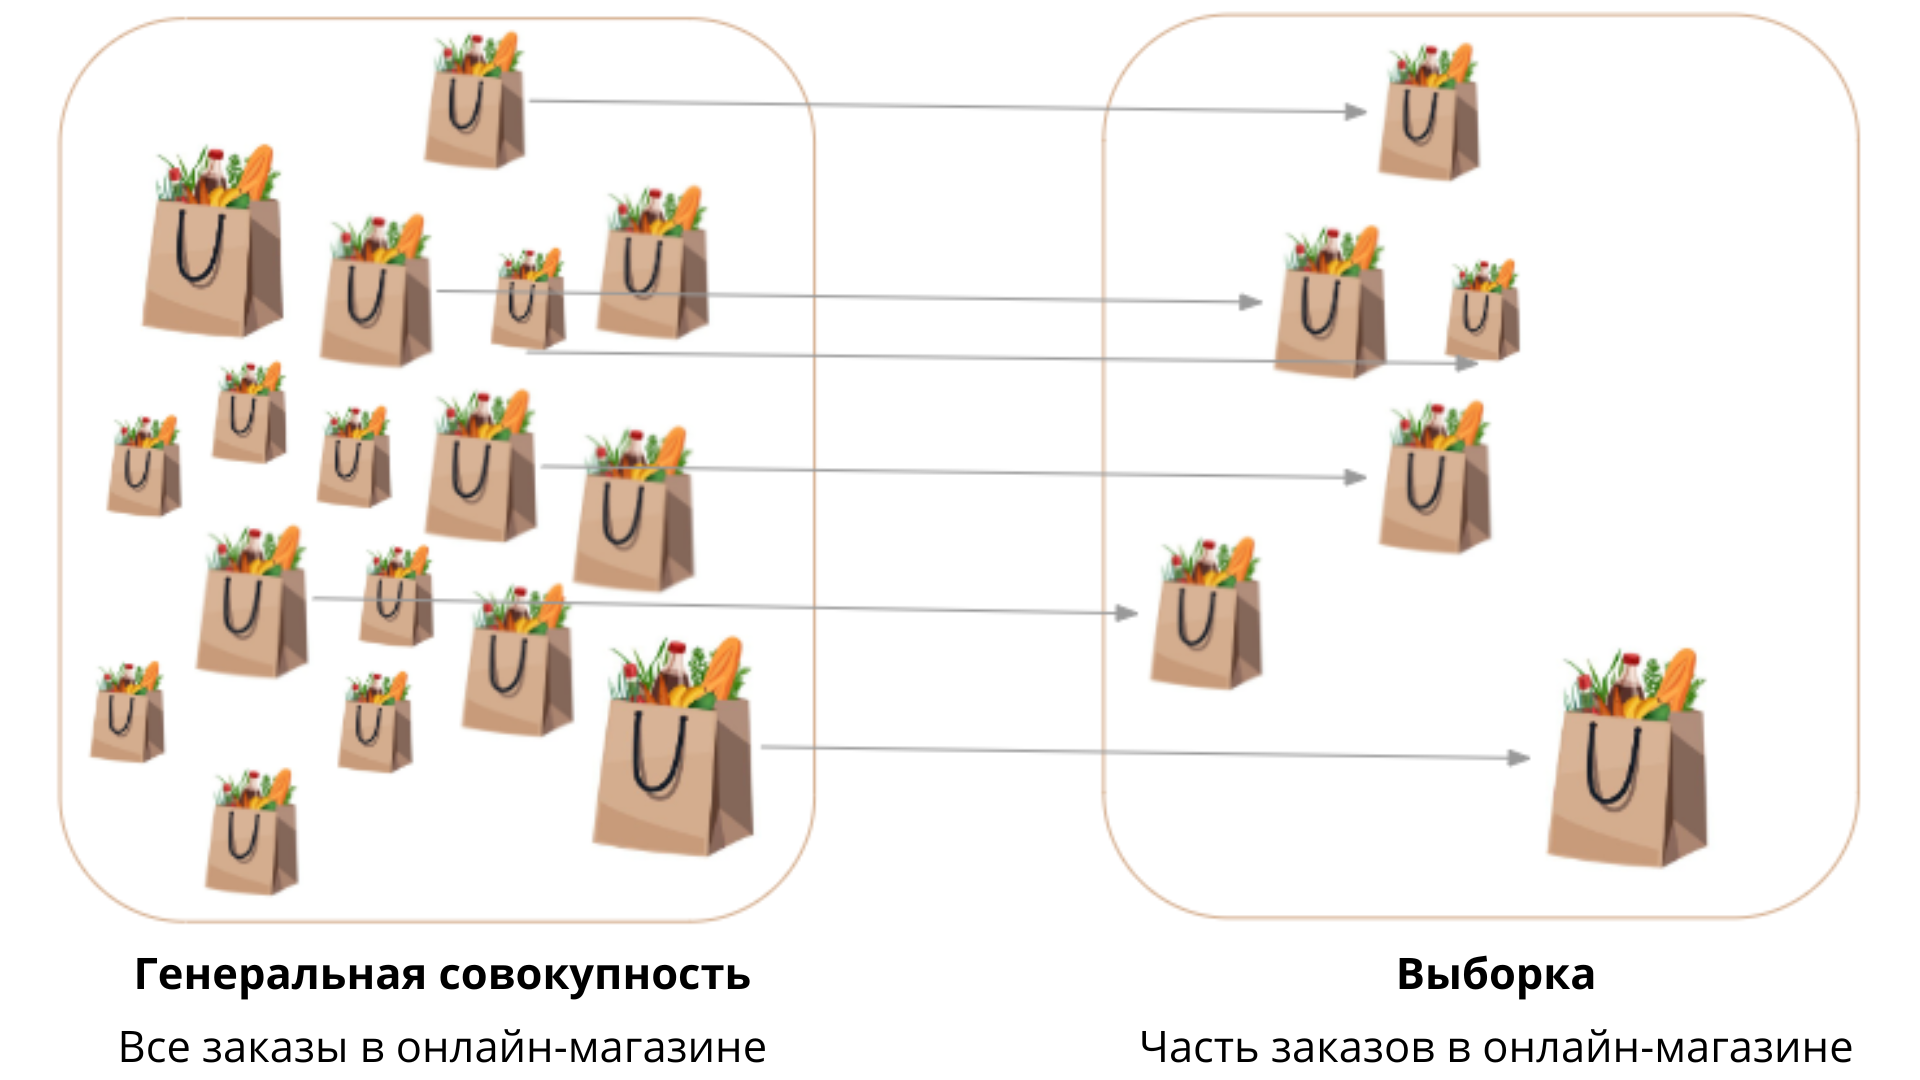

Мы уже знаем, что на основе выборки (части наблюдений) можно измерить следующие показатели:
- выборочное среднее (центральная мера распределения);
- выборочное стандартное отклонение (мера разброса);
- выборочная пропорция.

Однако на самом деле нас всегда интересуют параметры генеральной совокупности:
- истинное среднее — математическое ожидание ($\mu$, «мю»);
- истинное стандартное отклонение ($\sigma$, «сигма»);
- истинная пропорция ($\rho$).

Например, если речь идёт о среднем чеке заказов в онлайн-магазине, то нам важно узнать его не на выборке, а на всех заказах, то есть на генеральной совокупности.

***

Важно помнить о разнице между выборочными статистиками и параметрами генеральной совокупности.

Выборочная статистика — это случайная величина, так как рассчитана на случайной выборке. Например, значение среднего на двух разных выборках будет разным.

Параметр генеральной совокупности — это константа, конкретное число, которое, как правило, нам неизвестно и никогда не станет известным.

Однако благодаря статистическим тестам мы можем делать выводы о параметрах всей генеральной совокупности, имея только выборку наблюдений.

***

Как это можно сделать? Давайте разбираться.

>Допустим, мы хотим увеличить средний чек заказа в онлайн-магазине, внедрив новую рекомендательную систему. Команда Data Science должна оценить, насколько эффективно будет работать эта система. Запускать её для всех покупателей и после этого анализировать эффективность рискованно, так как требует вложения средств. Система может оказаться неэффективной, и её массовое внедрение может привести к репутационным издержкам.

Как тогда поступить?

Выходом будет:

- Показать рекомендации только части покупателей (выборке).
- Замерить средний чек на полученной выборке (пусть он получится равным N рублей).
- Провести статистическое тестирование, чтобы проверить значимость полученного результата для всей генеральной совокупности. То есть мы должны понять, есть ли разница в средних чеках по всем заказам (математических ожиданиях) до и после внедрения рекомендательной системы.
- Сделать вывод, запускать ли рекомендательную систему на весь магазин.

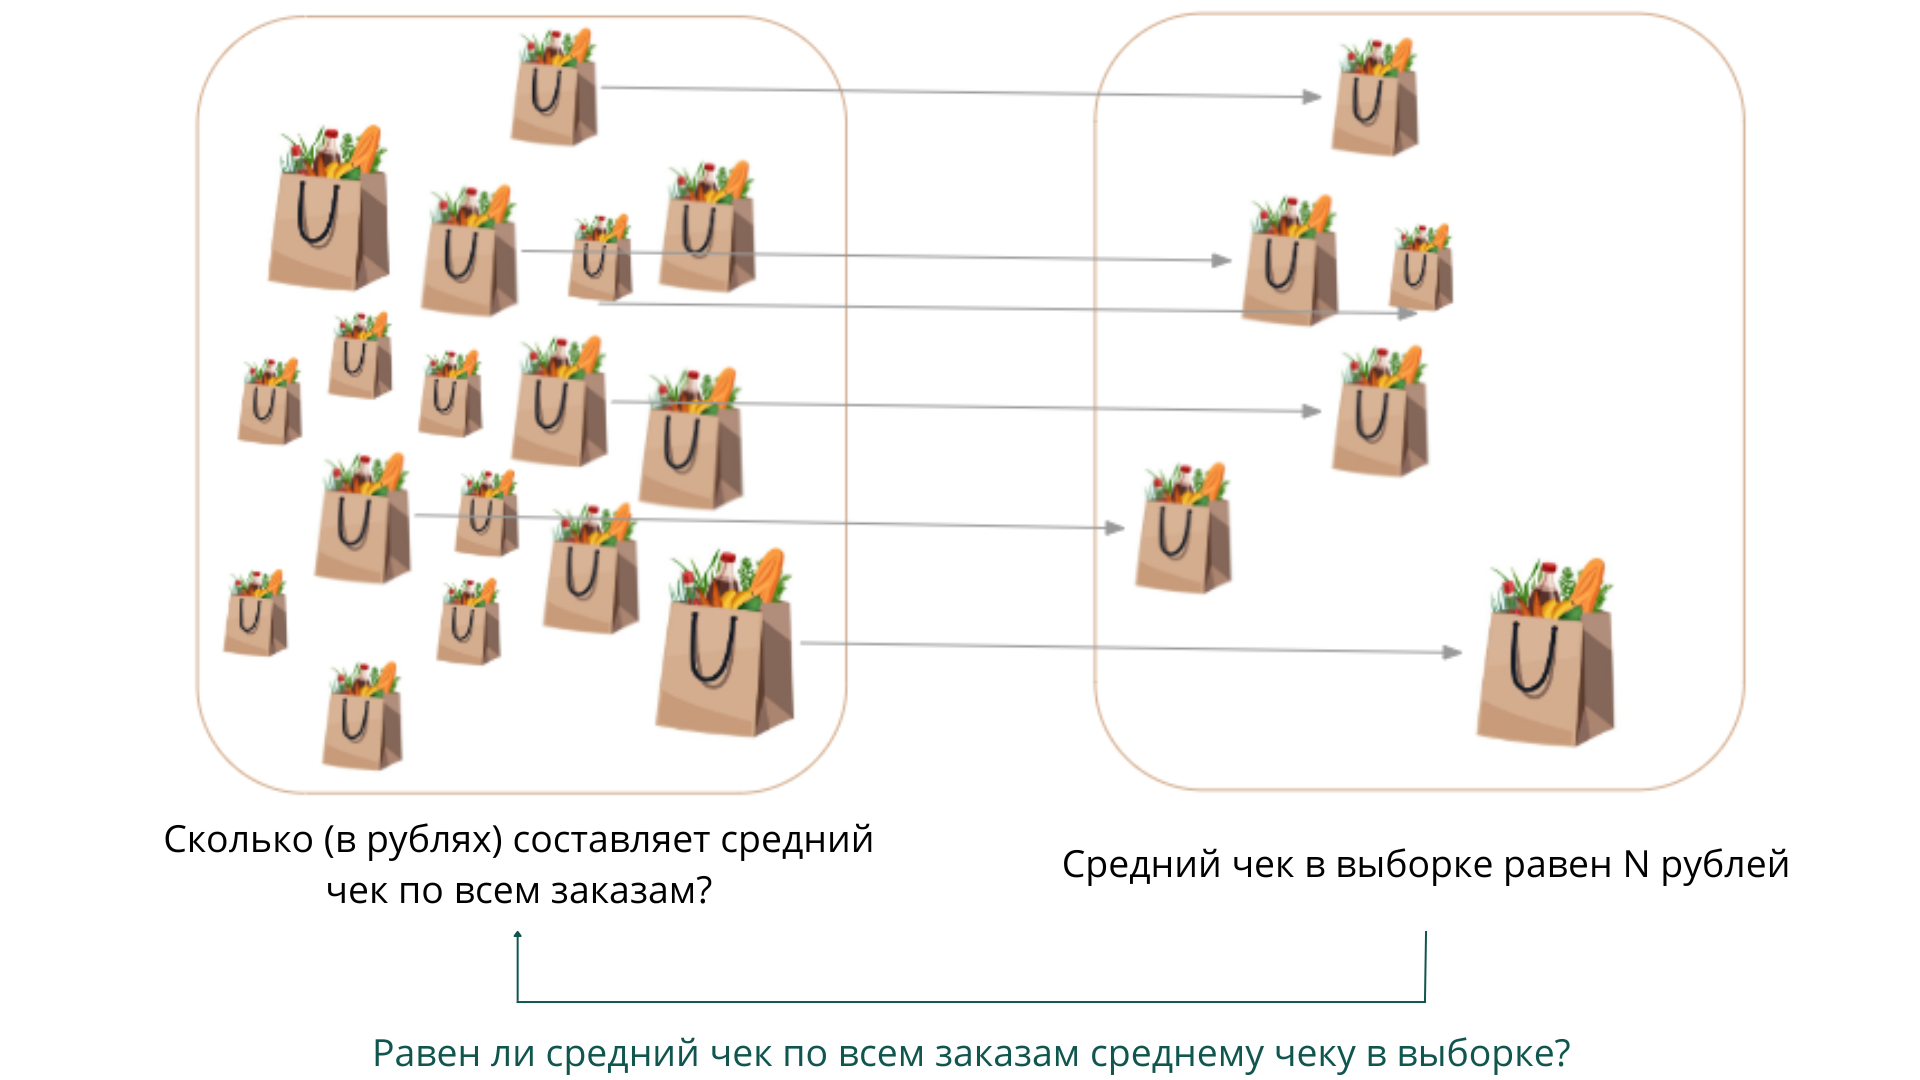

Почему нельзя просто сделать вывод, что если средний чек в выборке равен N рублей, то он также будет равен N рублей на всех заказах? Потому что, возможно, значения, полученные на выборке, не отражают значения на генеральной совокупности. Например, на рисунке ниже средний чек заказов в выборке меньше, чем средний чек по всем заказам.

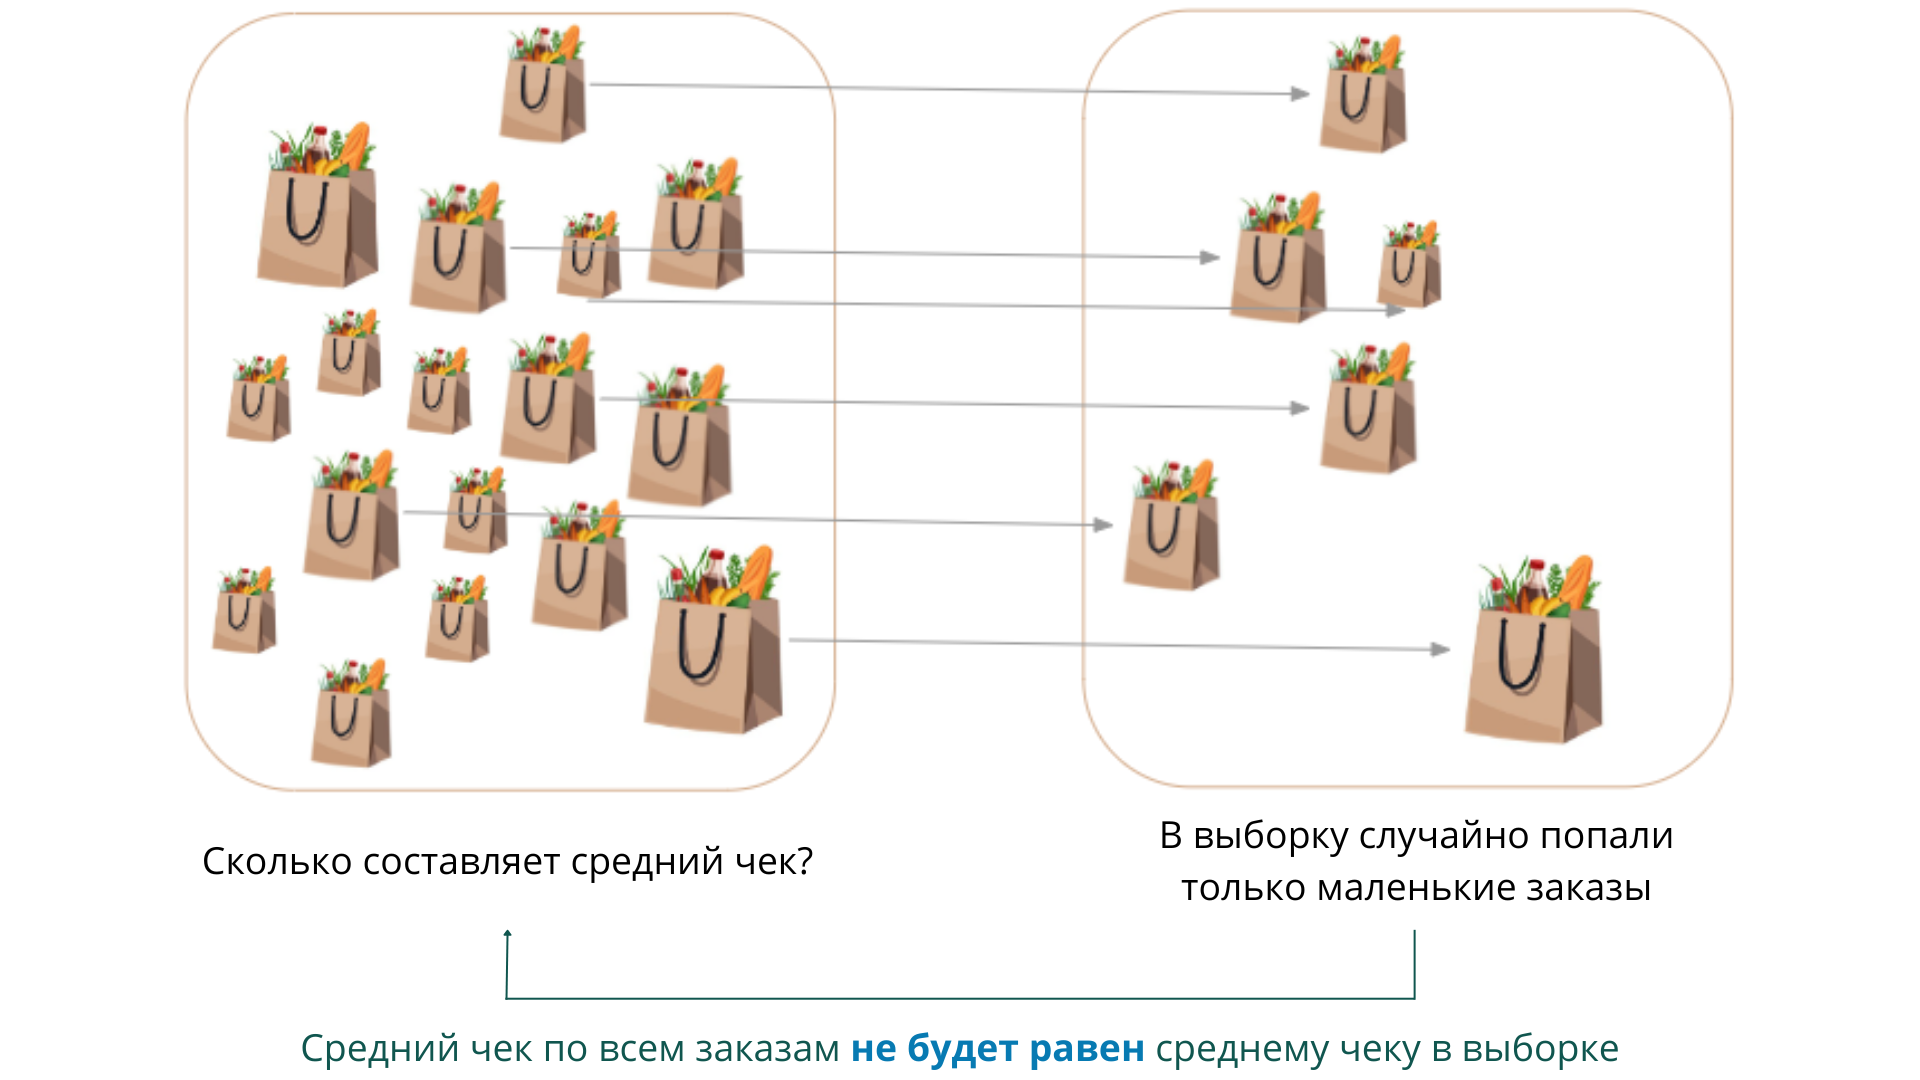

- Если бы мы запустили рекомендательную систему сразу на всех покупателей онлайн-магазина, то узнали бы, эффективна ли она, без статистических тестов, так как измерили бы все объекты в генеральной совокупности. Однако в случае неэффективности системы было бы уже поздно что-то менять, так как ресурсы компании уже потрачены на её внедрение.
- Если бы мы запустили рекомендательную систему только для части покупателей, но не провели статистические тесты, полученные выводы нельзя было бы распространить на все заказы.

>Резюмируем:   
    - Статистические тесты позволяют сделать выводы о всей генеральной совокупности по выборке.    
    - Статистические тесты нужны в случаях, когда мы не можем измерить все объекты в генеральной совокупности.    
    - Без статистических тестов выводы, полученные на выборке, нельзя распространить на всю генеральную совокупность.   


# Понятие статистической гипотезы

Итак, мы разобрались, в каких случаях необходимы статистические тесты. Настала пора знакомиться с ними, и мы начнём с важнейшего для статистических тестов понятия — статистической гипотезы.

>Статистическая гипотеза — это некоторое утверждение о параметрах генеральной совокупности, которое мы будем проверять на основе данных выборки. Например, утверждение «рекомендательная система влияет на средний чек покупки» — это статистическая гипотеза.

Примечание. Здесь и далее под «средним чеком покупки» мы будем иметь в виду средний чек на всей генеральной совокупности, то есть математическое ожидание среднего чека.

#### АЛГОРИТМ ПРОВЕРКИ СТАТИСТИЧЕСКИХ ГИПОТЕЗ

Общий алгоритм проверки гипотезы состоит из шести этапов:

- Построение нулевой и альтернативной гипотез.
- Выбор уровня значимости $\alpha$.
- Сбор данных для проверки гипотезы.
- Выбор статистического теста.
- Проведение статистического теста, вычисление p-value.
- Сравнение p-value c уровнем значимости $\alpha$ и вывод, отклонить или не отклонить нулевую гипотезу.

#### НУЛЕВАЯ И АЛЬТЕРНАТИВНАЯ ГИПОТЕЗЫ

Проведение статистических тестов начинается с формулирования двух конкурирующих между собой статистических гипотез — нулевой и альтернативной.
***
В качестве нулевой гипотезы $(H_0)$ обычно берётся утверждение об отсутствии эффекта, т. е. тех изменений, которых мы ожидали, нет.
- Пример нулевой гипотезы: рекомендательная система не влияет на средний чек покупки.
***
В качестве альтернативной гипотезы $(H_1)$ берётся утверждение о наличии эффекта (обратное нулевой гипотезе), т. е. те изменения, которых мы ожидали, есть.
- Пример альтернативной гипотезы: рекомендательная система влияет на средний чек покупки.
***

В ходе статистических тестов мы будем проверять нулевую гипотезу. Возможен один из двух результатов:

- отклоняем нулевую гипотезу в пользу альтернативной (делаем вывод, что эффект есть);
- не отклоняем нулевую гипотезу, так как для этого недостаточно оснований (нельзя сделать вывод о наличии эффекта).

Существует три варианта формулировки нулевой и альтернативной гипотез. Давайте рассмотрим формулировки вместе с их математической интерпретацией. Пусть $\mu_1$ — средний чек покупки без просмотра рекомендаций, $\mu_2$ — средний чек покупки после просмотра рекомендаций.

>Примечание. Ещё раз отметим, что $\mu_1$ и $\mu_2$ — средние значения чека на двух генеральных совокупностях (заказах до и после внедрения рекомендательной системы), т. е. они отражают средние чеки на всех покупках в онлайн-магазине и являются теоретическими величинами, измерить которые мы не можем.

Однако мы можем составить следующие бизнес-вопросы и соответствующие им гипотезы:

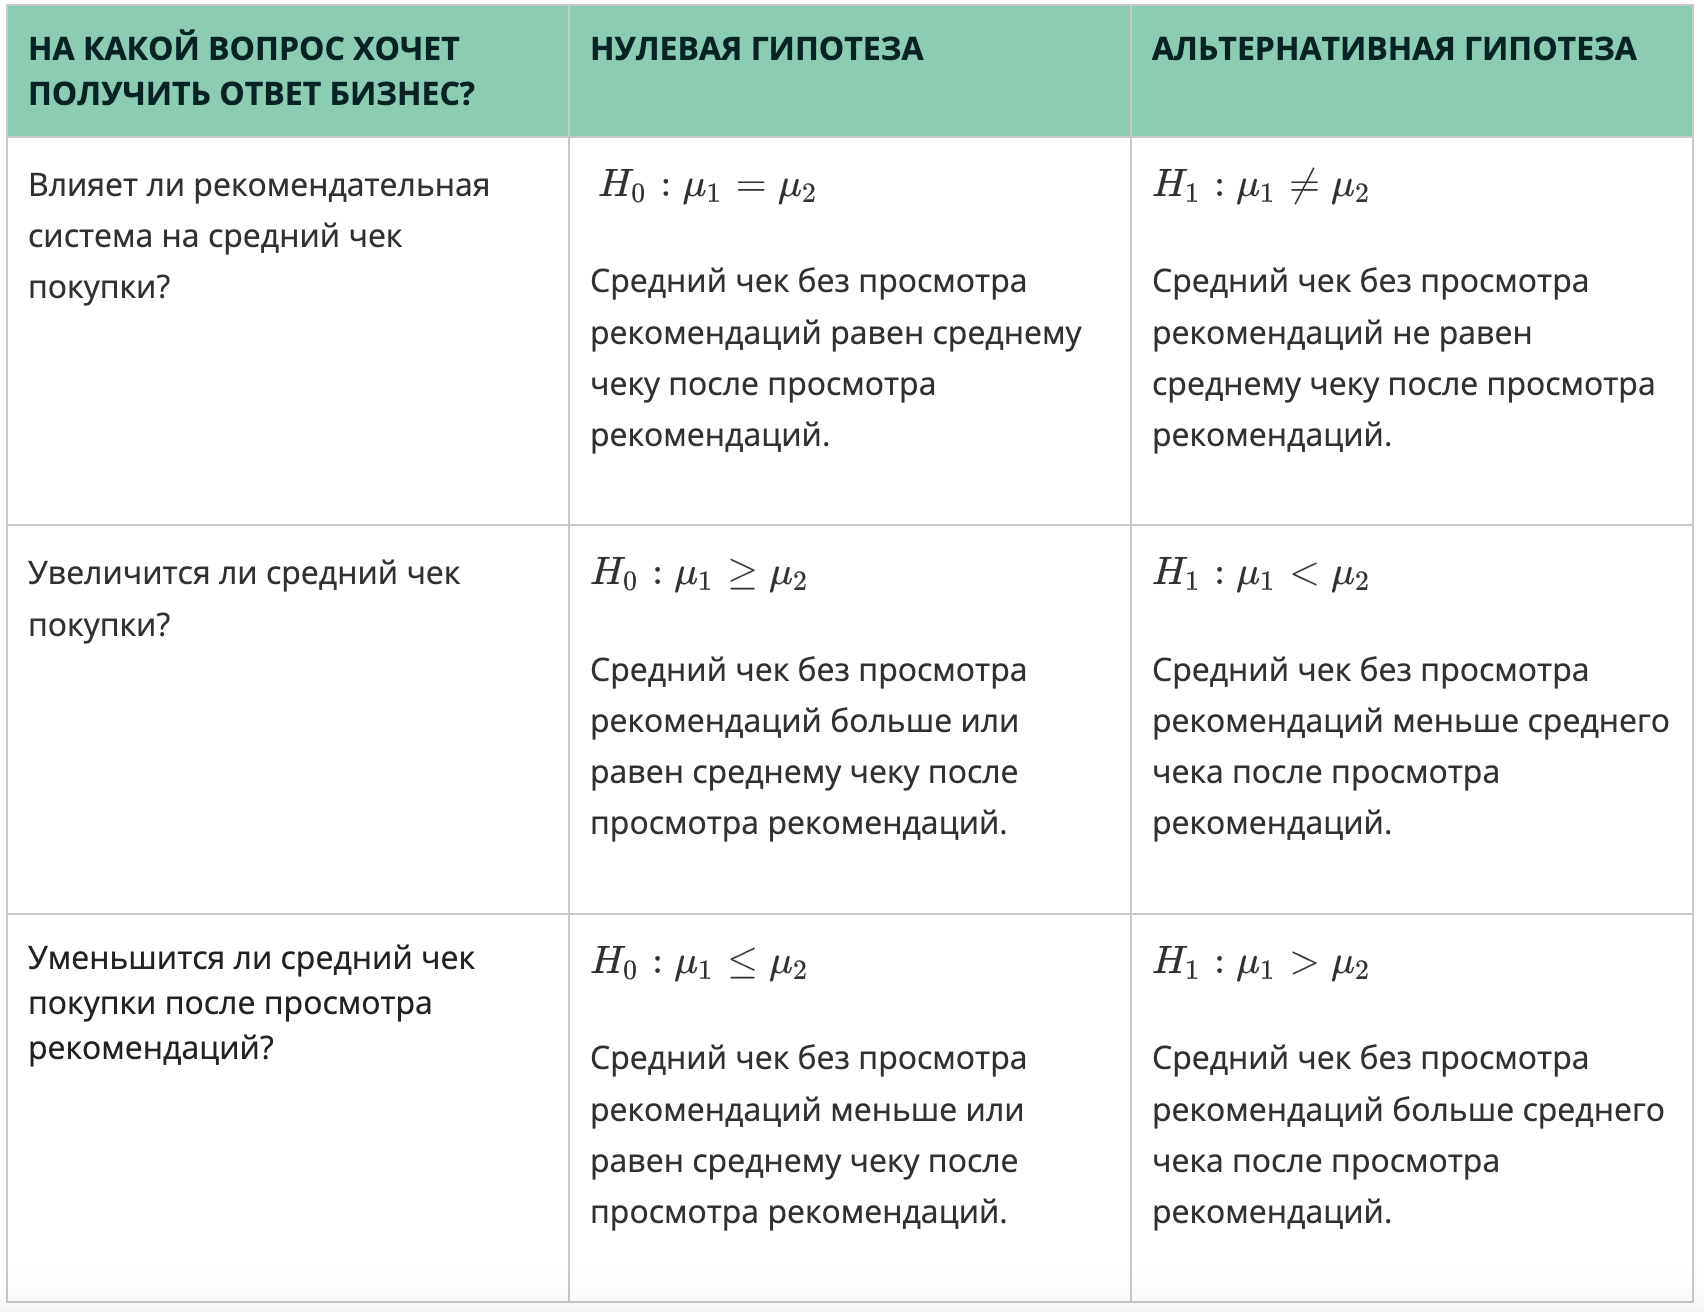

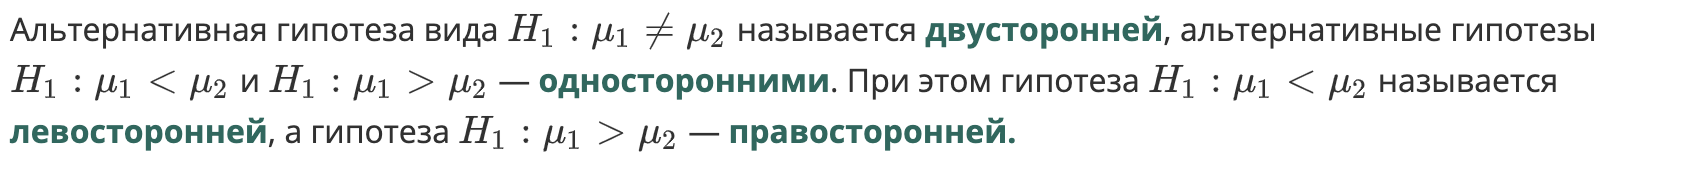

Рассмотрим тонкости формулировок гипотез более подробно.

1. В качестве первого примера возьмём наш кейс с внедрением рекомендательной системы. Предположим, мы хотим ответить на вопрос «Увеличится ли средний чек покупки после просмотра рекомендаций?».

Нулевая и альтернативная гипотезы будут следующими:
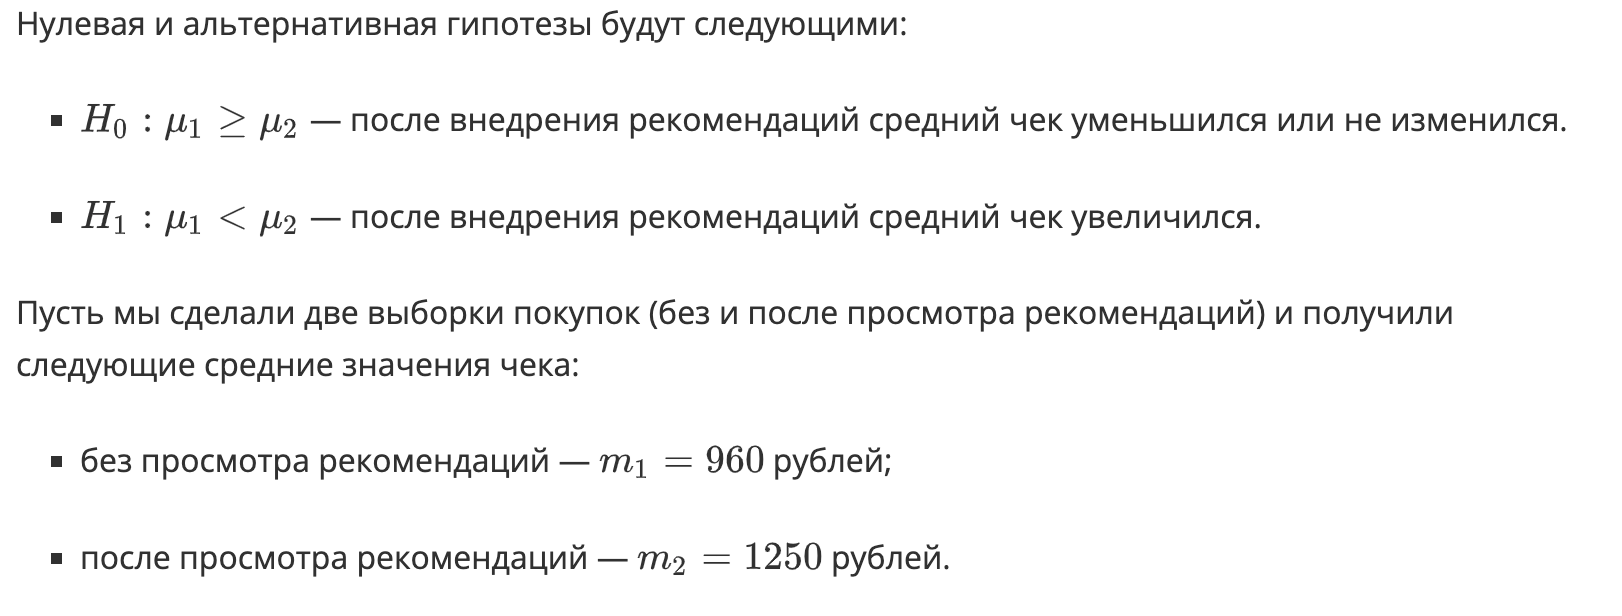

Проверка этих гипотез позволит определить, существует (статистически значима) ли разница в размере чеков в 290 рублей на генеральных совокупностях. То есть мы пытаемся выяснить, справедливо ли утверждение о генеральных совокупностях, основываясь только на выборочных значениях $m_1$ и $m_2$.

2. Представим, что мы работаем аналитиками в компании, которая производит кулинарные соусы. Недавно мы запустили новый продукт на рынок, и нам необходимо выяснить, соответствует ли качество соуса показателям, заявленным на упаковке. Мы знаем, что содержание натрия должно быть не более 300 мг на 100 г соуса, и хотим проверить, не превышено ли оно.

С точки зрения статистики это утверждение будет значить, что на генеральной совокупности среднее (математическое ожидание) содержание натрия ($\mu$), должно быть меньше или равно 300 мг на 100 г.

Тогда нулевая и альтернативная гипотезы будут следующими:
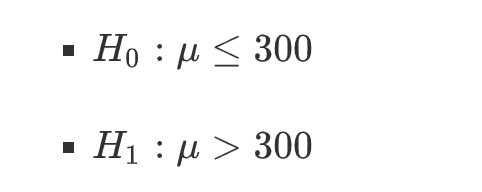

Для проверки этих гипотез мы делаем случайную выборку из бутылок соуса и измеряем содержание натрия в каждой из них. Предположим, что среднее значение содержания натрия в выборке составило m = 305 мг на 100 г соуса.

Проверив гипотезы, мы сможем понять, действительно ли среднее значение содержания натрия ($\mu$) отличается от заявленного на упаковке. Возможно, что измеренное нами выборочное значение m является следствием погрешностей и случайностей.

***

Как видите, в приведённых выше примерах постановка задач и формулировка гипотез отличаются:

- В первом случае нам необходимо было сравнить два средних на двух генеральных совокупностях на основе данных из двух выборок.
- Во втором случае мы имели дело с одной выборкой и хотели проверить соответствие математического ожидания требуемому показателю.

Почему это важно? Далее мы увидим, что один из критериев выбора статистического теста, — это количество групп (выборок). Например, в первом случае мы будем выбирать среди двухвыборочных тестов, а во втором — среди одновыборочных.

Итак, мы разобрали понятие статистической гипотезы и её основные виды: нулевую и альтернативную гипотезы. Нулевая гипотеза — это утверждение об отсутствии эффекта, который мы хотим проверить, а альтернативная — утверждение о наличии такого эффекта.

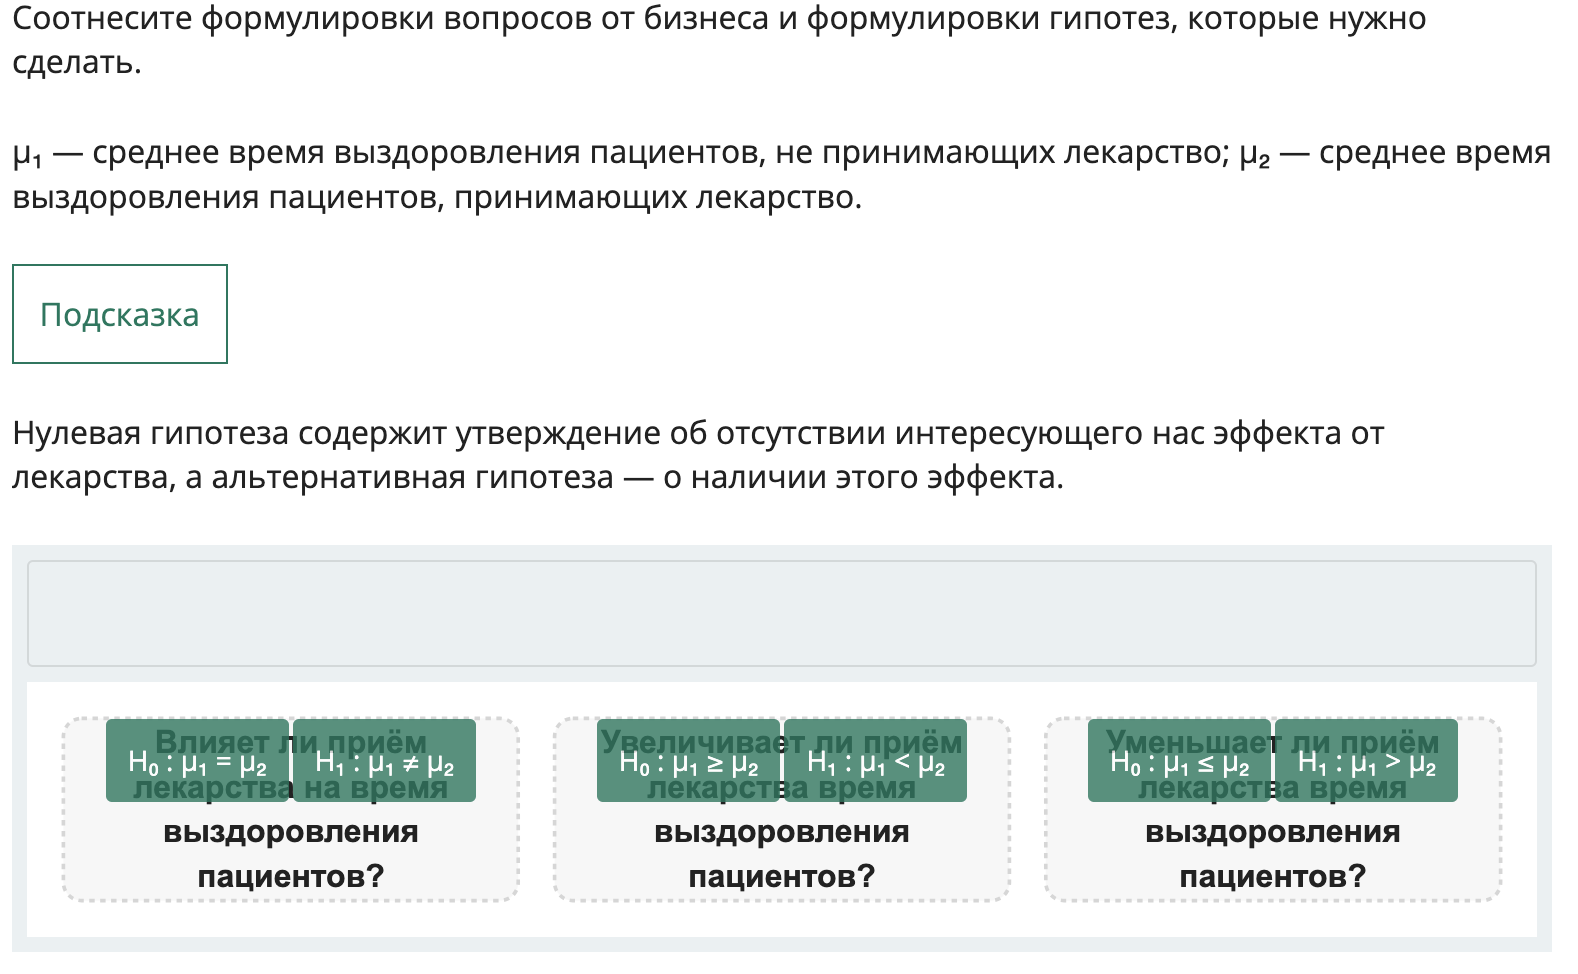

# Статистическая значимость

Наша задача как профессионалов в анализе данных — уметь корректно формулировать гипотезы, проверять их на имеющихся данных и объяснять результаты команде. Однако от нас требуется не только определить, подтверждают ли гипотезу имеющиеся данные, но и ответить на вопрос, насколько мы уверены в своём заключении, иными словами — насколько статистически значимы полученные нами результаты.

Чтобы ответить на этот вопрос, нужно понять, какие ошибки мы можем допустить при проверке гипотез, а также познакомиться с понятием статистической значимости (p-value).
***

#### ОШИБКИ I И II РОДА

При проверке гипотезы возможно допустить ошибку одного из двух видов:

Ошибка I (первого) рода: отклонение нулевой гипотезы, когда она на самом деле верна. Эта ошибка также называется $\alpha$-ошибкой, или ложноположительным результатом.
Ошибка II (второго) рода: неотклонение нулевой гипотезы, когда она на самом деле ложна. Эта ошибка также называется $\beta$-ошибкой, или ложноотрицательным результатом.

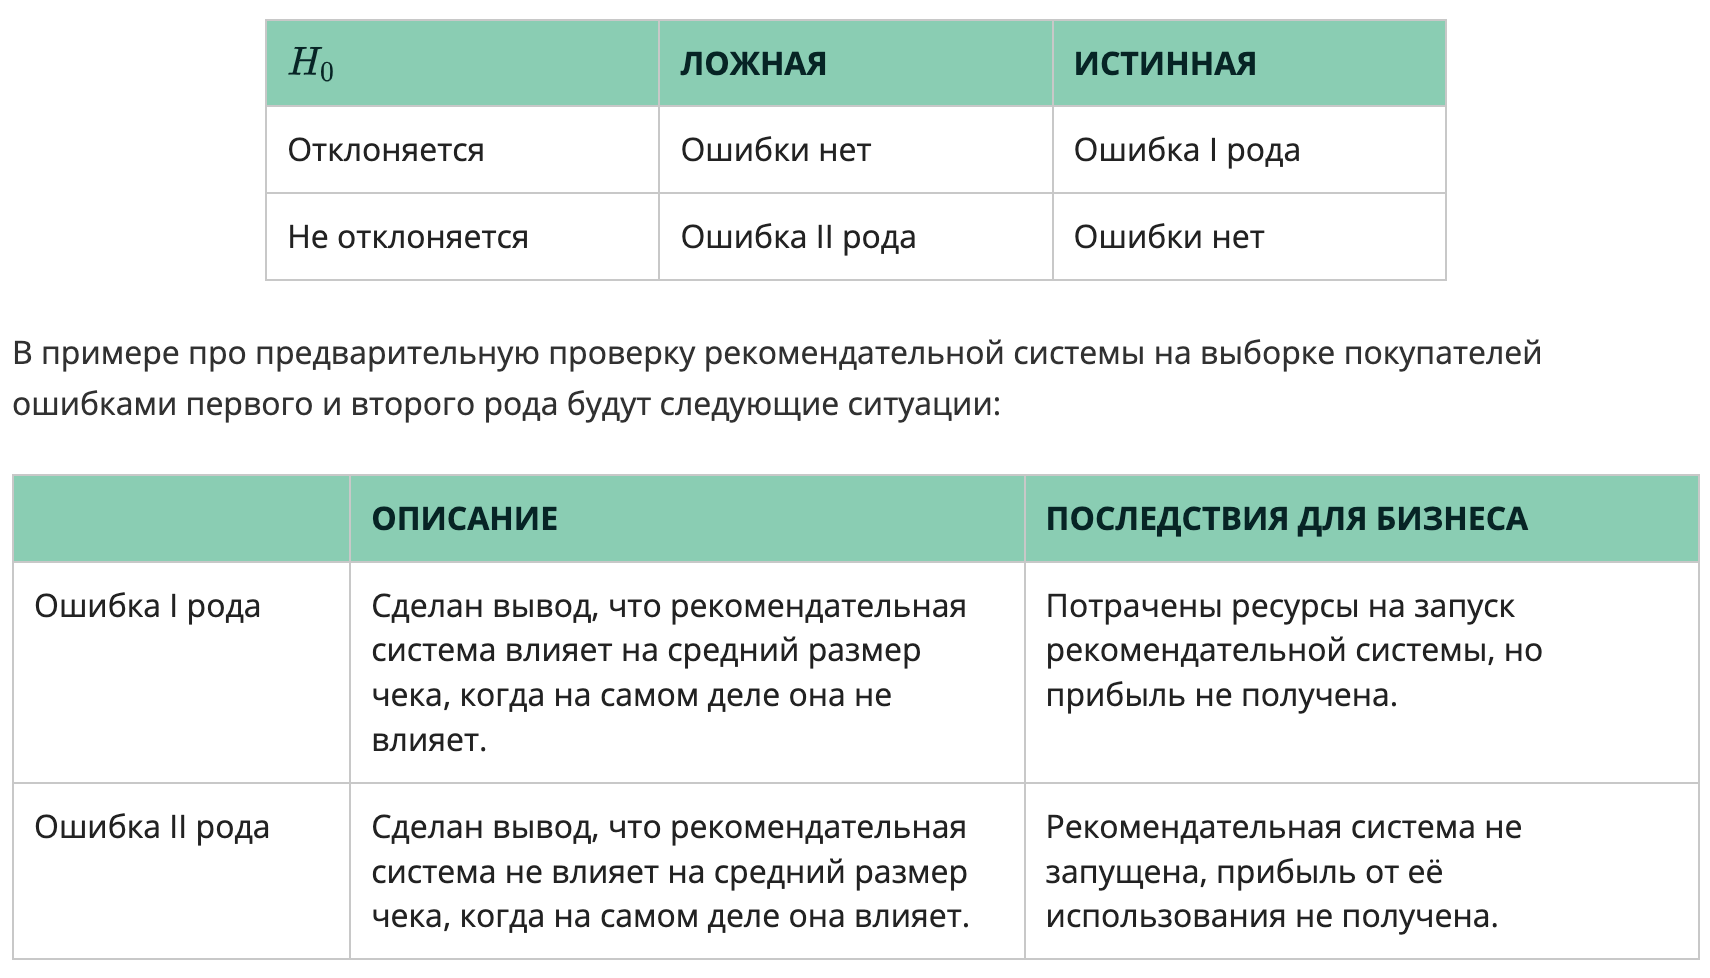

>Как вы понимаете, каждая из ошибок при проверке гипотезы может привести к определённым последствиям, которые важно учитывать при проведении тестирования гипотез.

Примечание. Вероятность не допустить ошибку II рода ($1 - \beta$) ещё называют мощностью теста. Например, если мощность теста составила 0.93, это значит, что вероятность того, что была допущена ошибка II рода, составляет 0.07 (7 %).

Примечание. Ошибки первого и второго рода — предмет активных исследований дата-сайентистов при решении задач классификации, когда необходимо оценить качество алгоритма.

В задаче бинарной классификации (разделении наблюдений на два класса) можно также совершить два вида ошибок. Например, если мы строим алгоритм, который классифицирует банковские транзакции на «стандартные» (класс 0) и «подозрительные/мошеннические» (класс 1), то этот алгоритм может:

- Отнести образец к классу 1, когда он на самом деле относится к классу 0. То есть банковская система может признать транзакцию подозрительной, когда она является стандартной. Это ошибка первого рода.
- Не отнести образец к классу 1, когда он на самом деле относится к классу 1. То есть банковская система может не признать транзакцию подозрительной, когда она является таковой. Это ошибка второго рода.

Данные, размеченные на два класса, используют в специальных алгоритмах машинного обучения, чтобы сформировать предсказания на новых данных. Подробнее об этом вы узнаете в модулях по машинному обучению.

***
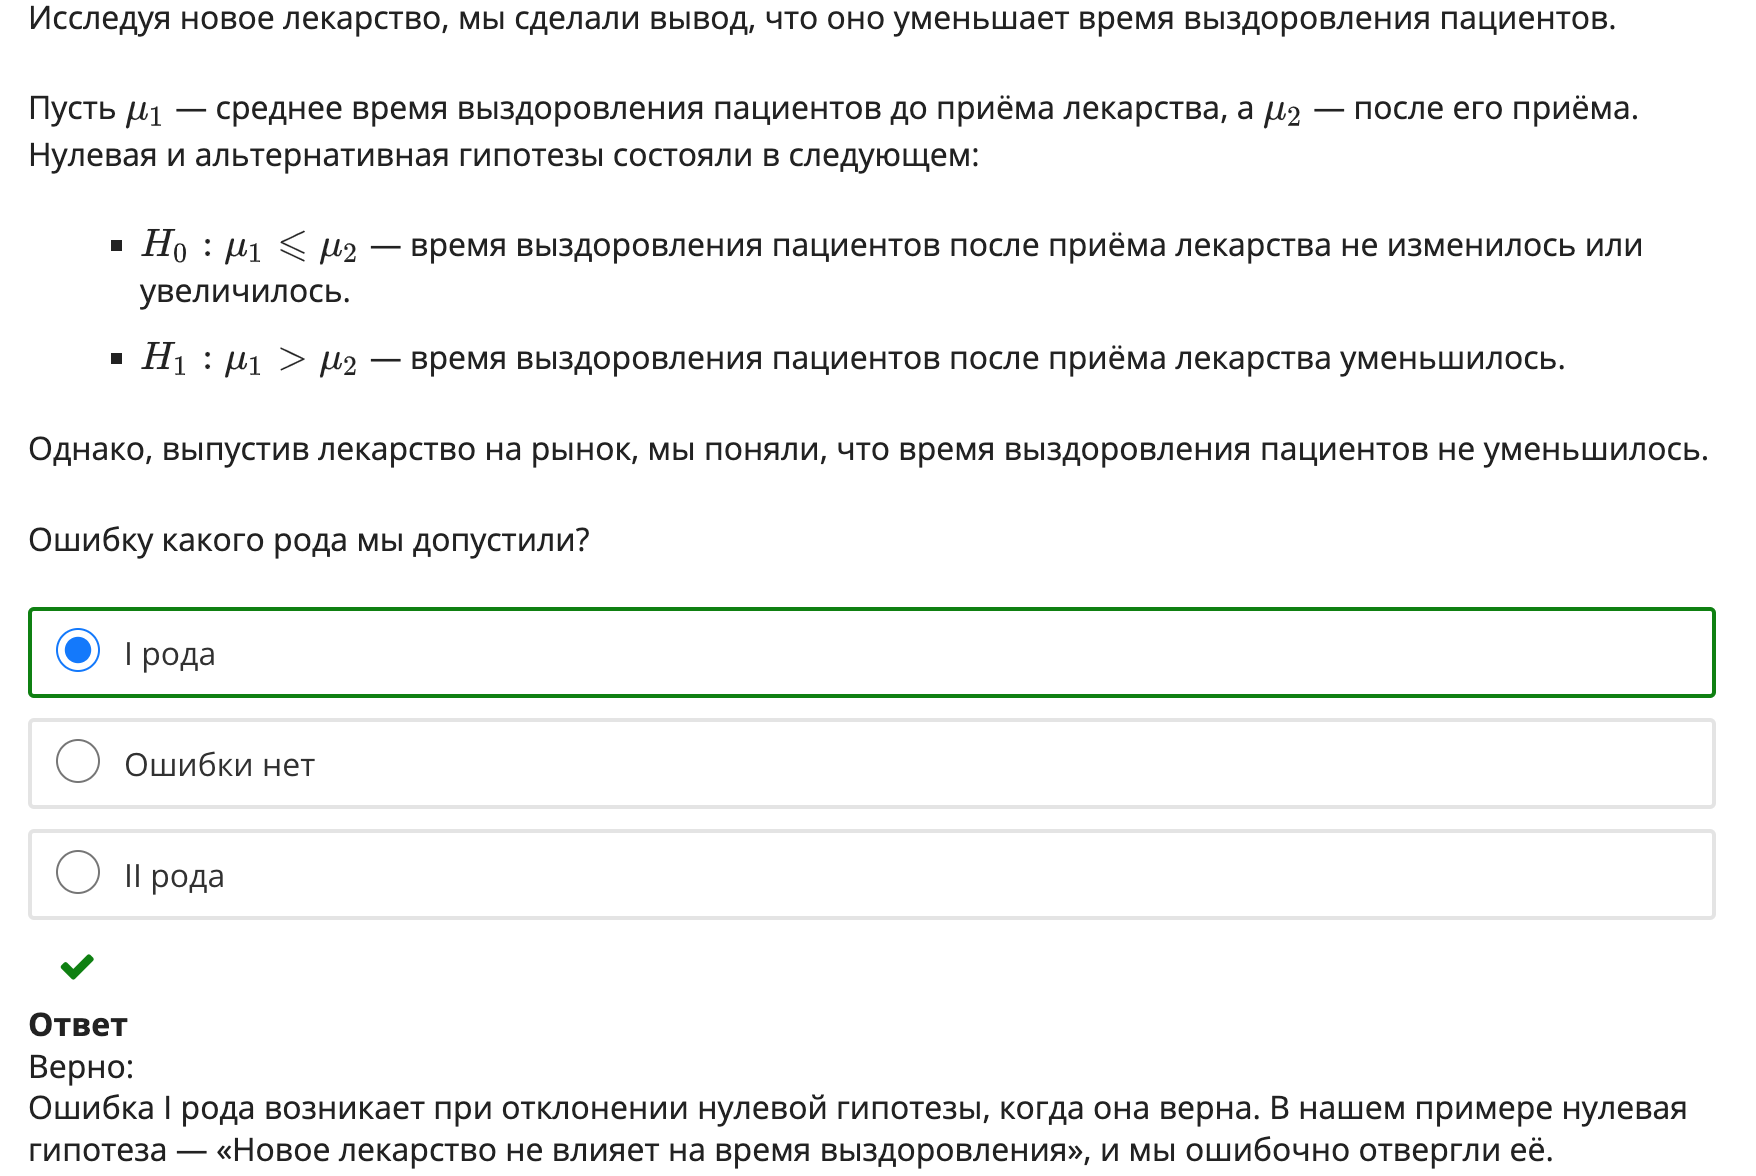

Для приведённых ниже бизнес-вопросов самостоятельно сформулируйте нулевую и альтернативную гипотезы, а также смысл ошибок первого и второго рода:

1. Уменьшается ли время ответа техподдержки благодаря использованию нового классификатора запросов?
2. Увеличивается ли время работы изделий при использовании материалов от нового поставщика?

1. 
    - H0 - Время ответа ТП не уменьшается
    - H1 - Время ответа ТП уменьшается
    - H0 <= H1 or H0 > H1
    - ошибка 1 рода - Время ответа уменьшаеться, тогда как на самом деле не уменьшаеться (истина H0, но ее отклонили)
    - ошибка 2 рода - Время ответа уменьшаеться на самом деле, но посчитали, что время ответа не уменьшаеться (истина H1, но ее отклонили)
    
2. 
    